Четврта лабораториска вежба по предметот Податочно рударство

Изработиле: Јана Митровска (181080) и Бојан Петрушевски (162012)

Тема: KNN класификација и/или регресија

# **Reading the dataset**

In [ ]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, classification_report, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...


# **Building the Model**

In [ ]:
data_encoded = data.apply(LabelEncoder().fit_transform)

In [ ]:
X = data_encoded.drop(['type'], axis = 1)
Y = data_encoded.type.values

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
#Скалирање на податоците
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **KNN Model**

In [ ]:
#Креирање на KNN classifier и ги фитуваме X_train, Y_train во моделот
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
#Правиме предикција на моделот
y_pred = knn_classifier.predict(X_test)

In [ ]:
#Анализирање на резултатите на предикциите во однос на моделот.
#1326 податоци се предвиделе како 1 и биле 1, 28 се предвиделе како 1 и биле 0
#26 податоци биле 0 и се предвиделе како 1, 567 податоци се предвиделе како 0 и биле 0 
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1326   28]
 [  26  567]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1354
           1       0.95      0.96      0.95       593

    accuracy                           0.97      1947
   macro avg       0.97      0.97      0.97      1947
weighted avg       0.97      0.97      0.97      1947



In [ ]:
error = []

for i in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

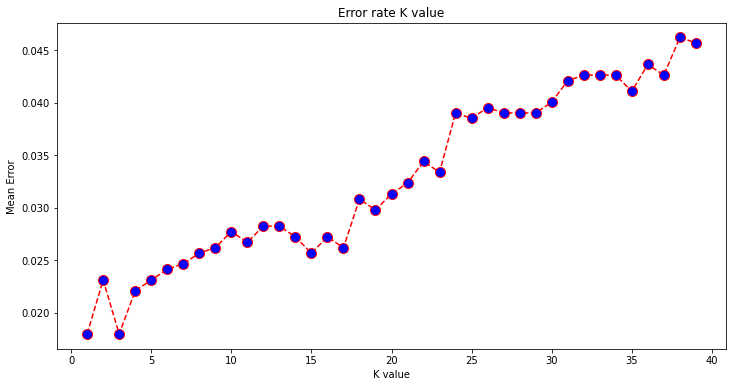

In [ ]:
#Анализа и графичко претставување на средната грешка на моделот за КНН класификаторот
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [ ]:
error2 = []

for i in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
  knn.fit(X_train,Y_train)
  pred_i = knn.predict(X_test)
  error2.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

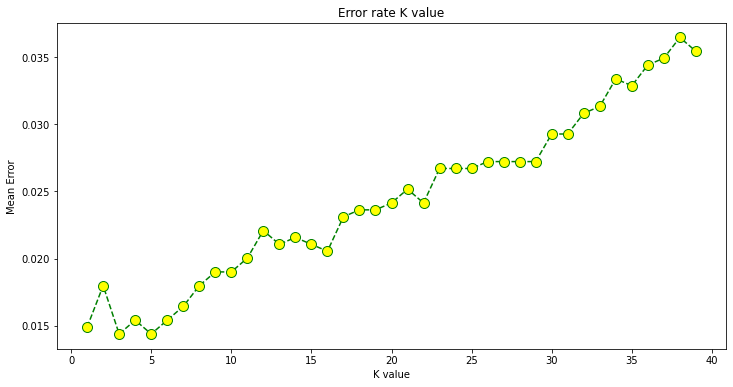

In [ ]:
#Анализа и графичко претставување на средната грешка на моделот за КНН класификаторот со косинусна метрика
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error2, color='green', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)

plt.title('Error rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')